## Cleaning data in Python

+ Using `assert` statements to verify data quality
+ Some data might appear to be numeric but actually be categorical
  + e.g. `marriage_status`: 0 = never married, 1 = married, 2 = separated, 3 = divorced
  + used `.astype('category')` as described in the **Working with Categorical Data in Python** course.
  + after using `.astype('category')` on a categorical column, running `describe()` will make more sense (better alignment)

In [1]:
import pandas as pd

df_ride_sharing = pd.read_csv('./data/ride_sharing_new.csv')
df_ride_sharing.head()

,Unnamed: 0,duration,station_A_id,station_A_name,station_B_id,station_B_name,bike_id,user_type,user_birth_year,user_gender
0,0,12 minutes,81,Berry St at 4th St,323,Broadway at Kearny,5480,2,1959,Male
1,1,24 minutes,3,Powell St BART Station (Market St at 4th St),118,Eureka Valley Recreation Center,5193,2,1965,Male
2,2,8 minutes,67,San Francisco Caltrain Station 2 (Townsend St...,23,The Embarcadero at Steuart St,3652,3,1993,Male
3,3,4 minutes,16,Steuart St at Market St,28,The Embarcadero at Bryant St,1883,1,1979,Male
4,4,11 minutes,22,Howard St at Beale St,350,8th St at Brannan St,4626,2,1994,Male


In [2]:
# Print the information of ride_sharing
print(df_ride_sharing.info(), "\n")

# Print summary statistics of user_type column
print(df_ride_sharing['user_type'].describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25760 entries, 0 to 25759
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       25760 non-null  int64 
 1   duration         25760 non-null  object
 2   station_A_id     25760 non-null  int64 
 3   station_A_name   25760 non-null  object
 4   station_B_id     25760 non-null  int64 
 5   station_B_name   25760 non-null  object
 6   bike_id          25760 non-null  int64 
 7   user_type        25760 non-null  int64 
 8   user_birth_year  25760 non-null  int64 
 9   user_gender      25760 non-null  object
dtypes: int64(6), object(4)
memory usage: 2.0+ MB
None 

count    25760.000000
mean         2.008385
std          0.704541
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          3.000000
Name: user_type, dtype: float64


In [3]:
# Print the information of ride_sharing
print(df_ride_sharing.info(), "\n")

# Print summary statistics of user_type column
print(df_ride_sharing['user_type'].describe(), "\n")

# Convert user_type from integer to category
df_ride_sharing['user_type_cat'] = df_ride_sharing['user_type'].astype('category')

# Write an assert statement confirming the change
assert df_ride_sharing['user_type_cat'].dtype == 'category'

# Print new summary statistics 
print(df_ride_sharing['user_type_cat'].describe(), "\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25760 entries, 0 to 25759
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       25760 non-null  int64 
 1   duration         25760 non-null  object
 2   station_A_id     25760 non-null  int64 
 3   station_A_name   25760 non-null  object
 4   station_B_id     25760 non-null  int64 
 5   station_B_name   25760 non-null  object
 6   bike_id          25760 non-null  int64 
 7   user_type        25760 non-null  int64 
 8   user_birth_year  25760 non-null  int64 
 9   user_gender      25760 non-null  object
dtypes: int64(6), object(4)
memory usage: 2.0+ MB
None 

count    25760.000000
mean         2.008385
std          0.704541
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          3.000000
Name: user_type, dtype: float64 

count     25760
unique        3
top           2
freq      12972
Name: user_type_cat,

In [4]:
# Strip duration of minutes
df_ride_sharing['duration_trim'] = df_ride_sharing['duration'].str.strip('minutes')

# Convert duration to integer
df_ride_sharing['duration_time'] = df_ride_sharing['duration_trim'].astype(int)

# Write an assert statement making sure of conversion
assert df_ride_sharing['duration_time'].dtype == 'int'

## Data range constraints

+ To follow along with the lectures, the `tire_size` and `ride_date` columns needed to be added to the data
  + The code to add these columns is commented out because they only needed to be run once.

In [5]:
print(df_ride_sharing.shape)
df_ride_sharing.columns

(25760, 13)


Index(['Unnamed: 0', 'duration', 'station_A_id', 'station_A_name',
       'station_B_id', 'station_B_name', 'bike_id', 'user_type',
       'user_birth_year', 'user_gender', 'user_type_cat', 'duration_trim',
       'duration_time'],
      dtype='object')

In [6]:
import numpy as np
import random

# # add a tire_sizes column (because it doesn't exist in the original data) to illustrate
# tire_sizes = [26, 27, 29]
# tire_size_probabilities = 100 * np.array([0.485, 0.313, 0.202])  # these were the proportions found on the execise data
# df_ride_sharing['tire_sizes'] = random.choices(tire_sizes, weights=tuple(tire_size_probabilities), k=df_ride_sharing.shape[0])
# # check that values follow specified distribution
# df_ride_sharing['tire_sizes'].value_counts(normalize=True)  # looks good:
# tire_sizes
# 26    0.487189
# 27    0.314946
# 29    0.197865

In [7]:
# write df with new column added
# df_ride_sharing.to_csv('./data/ride_sharing.csv')

In [8]:
# re-read the ride sharing data file with the new column
df_ride_sharing = pd.read_csv('./data/ride_sharing.csv')

# Convert tire_sizes to integer
df_ride_sharing['tire_sizes'] = df_ride_sharing['tire_sizes'].astype('int')

# Set all values above 27 to 27
df_ride_sharing.loc[df_ride_sharing['tire_sizes'] > 27, 'tire_sizes'] = 27

# Reconvert tire_sizes back to categorical
df_ride_sharing['tire_sizes'] = df_ride_sharing['tire_sizes'].astype('category')

# Print tire size description
print(df_ride_sharing['tire_sizes'].describe())

count     25760
unique        2
top          27
freq      13210
Name: tire_sizes, dtype: int64


In [9]:
import datetime as dt

# generate random dates between 5 years ago and 1 year into the future
# which is roughly what the exercise data was found to be
# rand_dates = []
# today_date = dt.date.today()
# for date_row in range(df_ride_sharing.shape[0]):
#     # https://stackoverflow.com/questions/553303/how-to-generate-a-random-date-between-two-other-dates#61383231
#     rand_delta = random.randint(-5*365, 365)
#     rand_date = today_date + dt.timedelta(days=rand_delta)
#     rand_dates.append(rand_date.strftime("%Y-%m-%d"))

# df_ride_sharing['ride_date'] = rand_dates
# print(df_ride_sharing['ride_date'].iloc[:11])  # looks good

In [10]:
# write df with new column added
# df_ride_sharing.to_csv('./data/ride_sharing.csv')

In [11]:
# Convert ride_date to date
df_ride_sharing['ride_dt'] = pd.to_datetime(df_ride_sharing['ride_date']).dt.date

# Save today's date
today = dt.date.today()

# Set all in the future to today's date
df_ride_sharing.loc[df_ride_sharing['ride_dt'] > today, 'ride_dt'] = today

# Print maximum of ride_dt column
print(df_ride_sharing['ride_dt'].max())

2025-04-13


## Uniqueness contraints - dealing with duplicates

+ The height and weight data file used for these lectures was **not** provided, so it was generated using ChatGPT with the prompt saved in the file `data/chat_gpt_prompt_data_gen.txt`. The resulting data file is provided in `data/height_weight_cgpt.csv`

### The `duplicated()` method

+ `subset` parameter: List of column names to check for duplication.
+ `keep` parameter: Whether to keep first (`'first'`), last (`'last'`) or all (`False`) duplicate values

In [12]:
height_weight = pd.read_csv('./data/height_weight_cgpt.csv', index_col='index')
height_weight.head()  # same output as slide 33 of 46 in chapter1.pdf

,first_name,last_name,address,height,weight
index,,,,,
0,Lane,Reese,534-1559 Nam St.,181,64
1,Ivor,Pierce,102-3364 Non Road,168,66
2,Roary,Gibson,"P.O. Box 344, 7785 Nisi Ave",191,99
3,Shannon,Little,691-2550 Consectetuer Street,185,65
4,Abdul,Fry,4565 Risus St.,169,65


In [13]:
# get duplicates across all columns
duplicates = height_weight.duplicated()
print(duplicates.iloc[[0,1,2,3,22,23,99,100,101,102,103]])

index
0      False
1      False
2      False
3      False
22     False
23     False
99     False
100     True
101    False
102     True
103    False
dtype: bool


In [14]:
height_weight[duplicates]  # same output as slide 35 of 46 in chapter1.pdf

,first_name,last_name,address,height,weight
index,,,,,
100,Mary,Colon,4674 Ut Rd.,179,75
102,Cole,Palmer,"8366 At, Street",178,91


In [15]:
 # Column names to check for duplication 
column_names = ['first_name','last_name','address'] 
duplicates = height_weight.duplicated(subset = column_names, keep = False)
height_weight[duplicates]  # same output as slide 37 of 46 in chapter1.pdf

,first_name,last_name,address,height,weight
index,,,,,
1,Ivor,Pierce,102-3364 Non Road,168,66
22,Cole,Palmer,"8366 At, Street",178,91
28,Desirae,Shannon,"P.O. Box 643, 5251 Consectetuer, Rd.",195,83
37,Mary,Colon,4674 Ut Rd.,179,75
100,Mary,Colon,4674 Ut Rd.,179,75
101,Ivor,Pierce,102-3364 Non Road,168,88
102,Cole,Palmer,"8366 At, Street",178,91
103,Desirae,Shannon,"P.O. Box 643, 5251 Consectetuer, Rd.",196,83


In [16]:
# visualizing the duplicates is easier when sorted propertly
height_weight[duplicates].sort_values(by='first_name')  # first & last pairs: just drop the extras
                                                        # middle 2 pairs require decisions

,first_name,last_name,address,height,weight
index,,,,,
22,Cole,Palmer,"8366 At, Street",178,91
102,Cole,Palmer,"8366 At, Street",178,91
28,Desirae,Shannon,"P.O. Box 643, 5251 Consectetuer, Rd.",195,83
103,Desirae,Shannon,"P.O. Box 643, 5251 Consectetuer, Rd.",196,83
1,Ivor,Pierce,102-3364 Non Road,168,66
101,Ivor,Pierce,102-3364 Non Road,168,88
37,Mary,Colon,4674 Ut Rd.,179,75
100,Mary,Colon,4674 Ut Rd.,179,75


In [17]:
# easy case: drop duplicates with all col values the same
height_weight.drop_duplicates(inplace = True) 

In [18]:
# what we have left after removing "easy" duplicate values 
column_names = ['first_name','last_name','address'] 
duplicates = height_weight.duplicated(subset = column_names, keep = False) 
height_weight[duplicates].sort_values(by = 'first_name') 

,first_name,last_name,address,height,weight
index,,,,,
28,Desirae,Shannon,"P.O. Box 643, 5251 Consectetuer, Rd.",195,83
103,Desirae,Shannon,"P.O. Box 643, 5251 Consectetuer, Rd.",196,83
1,Ivor,Pierce,102-3364 Non Road,168,66
101,Ivor,Pierce,102-3364 Non Road,168,88


In [19]:
# Group by column names and use max for height and mean for weight
column_names = ['first_name','last_name','address'] 
summaries = {'height': 'max', 'weight': 'mean'}
# Next line will only change non-easy duplicates and reset the index
height_weight = height_weight.groupby(by = column_names).agg(summaries).reset_index() 
# Make sure aggregation is done 
duplicates = height_weight.duplicated(subset = column_names, keep = False) 
height_weight[duplicates].sort_values(by = 'first_name') 

,first_name,last_name,address,height,weight


## Membership constraints - Text and categorical data problems

+ Predefined finite set of categories - **Examples:**
  + Marriage Status (binary) = {`unmarried`, `married`} or {0, 1}
  + Household Income Category = {`0-20k`, `20-40k`, `40-80k`, ...} or {0, 1, 2, ...}
  + Loan Status: {`default`, `payed`, `no_loan`} or {0, 1, 2}
+ Types of problem:
  + Date Entry Errors
  + Parsing Errors
+ Typical remedies:
  + drop data
  + remap categories
  + infer categories


In [20]:
# Read study data and print it, (not provided, so recreated manually)
study_data = pd.read_csv('./data/study.csv', index_col='index')
# correct categories
categories = pd.read_csv('./data/study_categories.csv', index_col='index')
# remove the index labels to match lecture slides
study_data.index.names = ['']
categories.index.names = ['']
print(study_data)
print(categories)

       name    birthday blood_type
                                  
1      Beth  2019-10-20         B-
2  Ignatius  2020-07-08         A-
3      Paul  2019-08-12         O+
4     Helen  2019-03-17         O-
5  Jennifer  2019-12-17         Z+
6   Kennedy  2020-04-27         A+
7     Keith  2019-04-19        AB+
  blood_type
            
1         O-
2         O+
3         A-
4         A+
5         B+
6         B-
7        AB+
8        AB-


In [21]:
study_data.columns

Index(['name', 'birthday', 'blood_type'], dtype='object')

In [22]:
# find inconsistent data
inconsistent_categories = set(study_data['blood_type']).difference(categories['blood_type']) 
print(inconsistent_categories)

{'Z+'}


In [23]:
inconsistent_categories = set(study_data['blood_type']).difference(categories['blood_type']) 
inconsistent_rows = study_data['blood_type'].isin(inconsistent_categories) 
inconsistent_data = study_data[inconsistent_rows]  
# Drop inconsistent categories and get consistent data only
consistent_data = study_data[~inconsistent_rows]
consistent_data

,name,birthday,blood_type
,,,
1,Beth,2019-10-20,B-
2,Ignatius,2020-07-08,A-
3,Paul,2019-08-12,O+
4,Helen,2019-03-17,O-
6,Kennedy,2020-04-27,A+
7,Keith,2019-04-19,AB+


### Pre-defined categories and airline data

In [24]:
airlines = pd.read_csv('./data/airlines_dirty.csv', index_col=[0])
print(airlines.shape)
airlines.head()

(2477, 12)


,id,day,airline,destination,dest_region,dest_size,boarding_area,dept_time,wait_min,cleanliness,safety,satisfaction
0,1351,Tuesday,UNITED INTL,KANSAI,Asia,Hub,Gates 91-102,2018-12-31,115.0,Clean,Neutral,Very satisfied
1,373,Friday,ALASKA,SAN JOSE DEL CABO,Canada/Mexico,Small,Gates 50-59,2018-12-31,135.0,Clean,Very safe,Very satisfied
2,2820,Thursday,DELTA,LOS ANGELES,West US,Hub,Gates 40-48,2018-12-31,70.0,Average,Somewhat safe,Neutral
3,1157,Tuesday,SOUTHWEST,LOS ANGELES,West US,Hub,Gates 20-39,2018-12-31,190.0,Clean,Very safe,Somewhat satsified
4,2992,Wednesday,AMERICAN,MIAMI,East US,Hub,Gates 50-59,2018-12-31,559.0,Unacceptable,Very safe,Somewhat satsified


In [25]:
# airline categories - create manually because they weren't included with course
# airline_cats = pd.DataFrame({
#     'cleanliness': ['Clean', 'Average', 'Somewhat clean', 'Somewhat dirty', 'Dirty'],
#     'safety': ['Neutral', 'Very safe', 'Somewhat safe', 'Very unsafe', 'Somewhat unsafe'],
#     'satisfaction': ['Very satisfied', 'Neutral', 'Somewhat satisfied', 'Somewhat unsatisfied', 'Very unsatisfied']  
# })

# airline_cats.to_csv("./data/airlines_cats.csv")

In [26]:
# Read the airlines categories file
airline_cats = pd.read_csv("./data/airlines_cats.csv", index_col=[0])

# Print categories DataFrame
print(airline_cats)

# Print unique values of survey columns in airlines
print('Cleanliness: ', airlines['cleanliness'].unique(), "\n")
print('Safety: ', airlines['safety'].unique(), "\n")
print('Satisfaction: ', airlines['satisfaction'].unique(), "\n")

      cleanliness           safety          satisfaction
0           Clean          Neutral        Very satisfied
1         Average        Very safe               Neutral
2  Somewhat clean    Somewhat safe    Somewhat satisfied
3  Somewhat dirty      Very unsafe  Somewhat unsatisfied
4           Dirty  Somewhat unsafe      Very unsatisfied
Cleanliness:  ['Clean' 'Average' 'Unacceptable' 'Somewhat clean' 'Somewhat dirty'
 'Dirty'] 

Safety:  ['Neutral' 'Very safe' 'Somewhat safe' 'Very unsafe' 'Somewhat unsafe'] 

Satisfaction:  ['Very satisfied' 'Neutral' 'Somewhat satsified' 'Somewhat unsatisfied'
 'Very unsatisfied'] 



### Airline category consistency

The `cleanliness` attribute has one or more `Unacceptable` rows. Which ones are they?

In [27]:
# Find the cleanliness category in airlines not in categories
cat_clean = set(airlines['cleanliness']).difference(airline_cats['cleanliness'])

# Find rows with that category
cat_clean_rows = airlines['cleanliness'].isin(cat_clean)

# Print rows with inconsistent category
print(airlines[cat_clean_rows])

       id        day           airline  destination  dest_region dest_size  \
4    2992  Wednesday          AMERICAN        MIAMI      East US       Hub   
18   2913     Friday  TURKISH AIRLINES     ISTANBUL  Middle East       Hub   
100  2321  Wednesday         SOUTHWEST  LOS ANGELES      West US       Hub   

    boarding_area   dept_time  wait_min   cleanliness         safety  \
4     Gates 50-59  2018-12-31     559.0  Unacceptable      Very safe   
18   Gates 91-102  2018-12-31     225.0  Unacceptable      Very safe   
100   Gates 20-39  2018-12-31     130.0  Unacceptable  Somewhat safe   

           satisfaction  
4    Somewhat satsified  
18   Somewhat satsified  
100  Somewhat satsified  


## Typical errors with categorical data

+ Value inconsistency
  + inconsistent fields: `married`, `Maried`, `UNMARRIED`, `non married`...
  + trailing white spaces: `married `, ` married `,
+ Too many categories
  +  collapse into managable groups: `0-20k`, `20-40k`, `40-60k`,...
  +  map groups to new ones: `rich`, `poor`
+ Make sure data is of type `category`

In [28]:
# Print unique values of both columns
print(airlines['dest_region'].unique(), "\n")  # 'East US' vs 'EAST US', 'Middle East' vs 'middle east'
print(airlines['dest_size'].unique())

['Asia' 'Canada/Mexico' 'West US' 'East US' 'Midwest US' 'EAST US'
 'Middle East' 'Europe' 'eur' 'Central/South America'
 'Australia/New Zealand' 'middle east'] 

['Hub' 'Small' '    Hub' 'Medium' 'Large' 'Hub     ' '    Small'
 'Medium     ' '    Medium' 'Small     ' '    Large' 'Large     ']


In [29]:
# Print unique values of both columns
print(airlines['dest_region'].unique())
print(airlines['dest_size'].unique(), "\n")

# Lower dest_region column and then replace "eur" with "europe"
airlines['dest_region'] = airlines['dest_region'].str.lower() 
airlines['dest_region'] = airlines['dest_region'].replace({'eur':'europe'})

# Remove white spaces from `dest_size`
airlines['dest_size'] = airlines['dest_size'].str.strip()

# Verify changes have been effected
print(airlines['dest_region'].unique())
print(airlines['dest_size'].unique())

['Asia' 'Canada/Mexico' 'West US' 'East US' 'Midwest US' 'EAST US'
 'Middle East' 'Europe' 'eur' 'Central/South America'
 'Australia/New Zealand' 'middle east']
['Hub' 'Small' '    Hub' 'Medium' 'Large' 'Hub     ' '    Small'
 'Medium     ' '    Medium' 'Small     ' '    Large' 'Large     '] 

['asia' 'canada/mexico' 'west us' 'east us' 'midwest us' 'middle east'
 'europe' 'central/south america' 'australia/new zealand']
['Hub' 'Small' 'Medium' 'Large']


In [30]:
# Create ranges for categories
label_ranges = [0, 60, 180, np.inf]
label_names = ['short', 'medium', 'long']

# Create wait_type column
airlines['wait_type'] = pd.cut(airlines['wait_min'], bins = label_ranges, 
                               labels = label_names)

# Create mappings and replace
mappings = {'Monday':'weekday', 'Tuesday':'weekday', 'Wednesday': 'weekday', 
            'Thursday': 'weekday', 'Friday': 'weekday', 
            'Saturday': 'weekend', 'Sunday': 'weekend'}

airlines['day_week'] = airlines['day'].replace(mappings)

print(airlines.columns)
airlines[['wait_type', 'day_week']].head()

Index(['id', 'day', 'airline', 'destination', 'dest_region', 'dest_size',
       'boarding_area', 'dept_time', 'wait_min', 'cleanliness', 'safety',
       'satisfaction', 'wait_type', 'day_week'],
      dtype='object')


,wait_type,day_week
0,medium,weekday
1,medium,weekday
2,medium,weekday
3,long,weekday
4,long,weekday


## Text data and regex

+ data inconsistencies
+ fixed length violations
+ typos
+ tbd

In [31]:
phones = pd.read_csv("./data/phones.csv", header=0)
phones  # row 3: inconsistent data format, row 5: length violation

,Full name,Phone number
0,Noelani A. Gray,001-702-397-5143
1,Myles Z. Gomez,001-329-485-0540
2,Gil B. Silva,001-195-492-2338
3,Prescott D. Hardin,+1-297-996-4904
4,Benedict G. Valdez,001-969-820-3536
5,Reece M. Andrews,4138
6,Hayfa E. Keith,001-536-175-8444
7,Hedley I. Logan,001-681-552-1823
8,Jack W. Carrillo,001-910-323-5265
9,Lionel M. Davis,001-143-119-9210


### Ideally, we'd like the data to look like this

In [32]:
phones_clean = pd.read_csv("./data/phones_ideally.csv", dtype={"Full name":str , "Phone number":str}, header=0)
phones_clean

,Full name,Phone number
0,Noelani A. Gray,0017023975143
1,Myles Z. Gomez,0013294850540
2,Gil B. Silva,0011954922338
3,Prescott D. Hardin,0012979964904
4,Benedict G. Valdez,0019698203536
5,Reece M. Andrews,NaN
6,Hayfa E. Keith,0015361758444
7,Hedley I. Logan,0016815521823
8,Jack W. Carrillo,0019103235265
9,Lionel M. Davis,0011431199210


In [33]:
# convert to what we want - 1) start by replacing + with 00
phones["Phone number"] = phones["Phone number"].str.replace("+", "00")
phones

,Full name,Phone number
0,Noelani A. Gray,001-702-397-5143
1,Myles Z. Gomez,001-329-485-0540
2,Gil B. Silva,001-195-492-2338
3,Prescott D. Hardin,001-297-996-4904
4,Benedict G. Valdez,001-969-820-3536
5,Reece M. Andrews,4138
6,Hayfa E. Keith,001-536-175-8444
7,Hedley I. Logan,001-681-552-1823
8,Jack W. Carrillo,001-910-323-5265
9,Lionel M. Davis,001-143-119-9210


In [34]:
# 2) replace "-" with empty string 
phones["Phone number"] = phones["Phone number"].str.replace("-", "") 
phones 

,Full name,Phone number
0,Noelani A. Gray,0017023975143
1,Myles Z. Gomez,0013294850540
2,Gil B. Silva,0011954922338
3,Prescott D. Hardin,0012979964904
4,Benedict G. Valdez,0019698203536
5,Reece M. Andrews,4138
6,Hayfa E. Keith,0015361758444
7,Hedley I. Logan,0016815521823
8,Jack W. Carrillo,0019103235265
9,Lionel M. Davis,0011431199210


In [35]:
# 3) replace phone numbers with less than 10 digits with NaN
digits = phones["Phone number"].str.len()
phones.loc[digits < 10, "Phone number"] = np.nan
phones

,Full name,Phone number
0,Noelani A. Gray,0017023975143
1,Myles Z. Gomez,0013294850540
2,Gil B. Silva,0011954922338
3,Prescott D. Hardin,0012979964904
4,Benedict G. Valdez,0019698203536
5,Reece M. Andrews,NaN
6,Hayfa E. Keith,0015361758444
7,Hedley I. Logan,0016815521823
8,Jack W. Carrillo,0019103235265
9,Lionel M. Davis,0011431199210


In [36]:
# Test fixes - find length of each row in Phone number column 
sanity_check = phones['Phone number'].str.len() 
# Assert minmum phone number length is 10 
assert sanity_check.min() >= 10 
# Assert all numbers do not have "+" or "-" 
assert phones['Phone number'].str.contains("\\+|-").any() == False  # need to escape the + because it's a special regex char

In [37]:
# reload the airline data
airlines = pd.read_csv('./data/airlines_dirty_200.csv', index_col=[0])
airlines['full_name'].head(10)

0              Melodie Stuart
1             Dominic Shannon
2           Quintessa Tillman
3     Dr. Christine Nicholson
4             Regina Clements
5             Colleen Harding
6             Kaitlin Cochran
8                Molly Norton
9                Richard Lott
10             Matthew Nguyen
Name: full_name, dtype: object

In [38]:
# Replace "Dr." with empty string ""
airlines['full_name'] = airlines['full_name'].str.replace("Dr.","")

# Replace "Mr." with empty string ""
airlines['full_name'] = airlines['full_name'].str.replace("Mr.","")

# Replace "Miss" with empty string ""
airlines['full_name'] = airlines['full_name'].str.replace("Miss","")

# Replace "Ms." with empty string ""
airlines['full_name'] = airlines['full_name'].str.replace("Ms.","")

# Assert that full_name has no honorifics - need to escape the . (special regex char)
assert airlines['full_name'].str.contains('Ms\\.|Mr\\.|Miss|Dr\\.').any() == False

In [39]:
# troubleshoot
# pd.set_option('display.max_rows', None)  # so we can see all the rows
# pd.set_option('display.max_columns', None)
# airlines['test_names'] = airlines['full_name'].str.contains('Ms\\.|Mr\\.|Miss|Dr\\.')
# airlines[['full_name', 'test_names']]

### Survey response length example

**TODO** Need to augment the `airlines` data with a `survey_response` column befor the next cell will run w/o error.

In [40]:
# Store length of each row in survey_response column
# resp_length = airlines['survey_response'].str.len()

# Find rows in airlines where resp_length > 40
# airlines_survey = airlines[resp_length > 40]

# Assert minimum survey_response length is > 40
# assert airlines_survey['survey_response'].str.len().min() > 40

# Print new survey_response column
# print(airlines_survey['survey_response'])

## Data Uniformity

In [41]:
banking = pd.read_csv('./data/banking_97.csv')
banking.shape

(97, 6)

In [42]:
banking.head(10)

,cust_id,acct_amount,acct_cur,inv_amount,account_opened,last_transaction
0,8C35540A,44244.71,dollar,35500.50,03-05-18,30-09-19
1,D5536652,86506.85,dollar,81921.86,21-01-18,14-01-19
2,A631984D,77799.33,dollar,46412.27,26-01-18,06-10-19
3,93F2F951,93875.24,euro,76563.35,21-08-17,10-07-19
4,DE0A0882,99998.35,euro,18669.01,05-06-17,15-01-19
5,25E68E1B,109737.62,dollar,93552.69,26-12-17,12-11-18
6,3FA9296D,79744.23,dollar,70357.70,21-06-18,24-08-18
7,984403B9,17939.88,euro,14429.59,07-10-17,18-05-18
8,870A9281,63523.31,dollar,51297.32,02-09-18,22-02-19
9,166B05B0,38175.46,euro,15052.70,28-02-19,31-10-18


In [43]:
# Find values of acct_cur that are equal to 'euro'
acct_eu = banking['acct_cur'] == 'euro'

# Convert acct_amount where it is in euro to dollars
banking.loc[acct_eu, 'acct_amount'] = banking.loc[acct_eu, 'acct_amount'] * 1.1

# Unify acct_cur column by changing 'euro' values to 'dollar'
banking.loc[acct_eu, 'acct_cur'] = 'dollar'

# Assert that only dollar currency remains
assert banking['acct_cur'].unique() == 'dollar'

## Cross field validation

As an example, suppose each customer of a bank has money invested in 4 funds: **fund_A**, **fund_B**, **fund_C** and **fund_D**. Further suppose that the amount invested in each fund is stored in different source. If these sources are merged, we would see something similar to what is shown in the next cell.

We would expect the sum of the amount in each fund to equal the total amount invested (`inv_amount` column).  We can validate this expection easily by summing the fund values and comparing them to the total as shown below.

In [44]:
banking_dirty = pd.read_csv('./data/banking_dirty.csv', index_col=[0])
print(banking_dirty.shape)
banking_dirty.head()

(100, 11)


,cust_id,birth_date,Age,acct_amount,inv_amount,fund_A,fund_B,fund_C,fund_D,account_opened,last_transaction
0,870A9281,1962-06-09,58,63523.31,51295,30105.0,4138.0,1420.0,15632.0,02-09-18,22-02-19
1,166B05B0,1962-12-16,58,38175.46,15050,4995.0,938.0,6696.0,2421.0,28-02-19,31-10-18
2,BFC13E88,1990-09-12,34,59863.77,24567,10323.0,4590.0,8469.0,1185.0,25-04-18,02-04-18
3,F2158F66,1985-11-03,35,84132.10,23712,3908.0,492.0,6482.0,12830.0,07-11-17,08-11-18
4,7A73F334,1990-05-17,30,120512.00,93230,12158.4,51281.0,13434.0,18383.0,14-05-18,19-07-18


In [45]:
# Store fund columns to sum against
fund_columns = ['fund_A', 'fund_B', 'fund_C', 'fund_D']

# Find rows where fund_columns row sum == inv_amount
inv_equ = banking_dirty[fund_columns].sum(axis=1) == banking_dirty['inv_amount']

# Store consistent and inconsistent data
consistent_inv = banking_dirty[inv_equ]
inconsistent_inv = banking_dirty[~inv_equ]

# Store consistent and inconsistent data
print("Number of inconsistent investments: ", inconsistent_inv.shape[0])

Number of inconsistent investments:  8


In [46]:
inconsistent_inv

,cust_id,birth_date,Age,acct_amount,inv_amount,fund_A,fund_B,fund_C,fund_D,account_opened,last_transaction
4,7A73F334,1990-05-17,30,120512.00,93230,12158.40,51281.00,13434.00,18383.00,14-05-18,19-07-18
12,EEBD980F,1990-11-20,34,57838.49,50812,18314.00,1477.00,29049.48,5539.00,08-12-18,04-01-20
22,96525DA6,1992-11-23,28,82511.24,33927,8206.00,15019.00,5559.60,6182.00,23-07-18,07-08-18
43,38B8CD9C,1970-06-25,50,28834.71,27531,314.00,6072.28,14163.00,7908.00,17-09-18,05-02-20
47,68C55974,1962-07-08,58,95038.14,66796,33764.00,5042.00,10659.00,19237.41,03-04-18,25-09-18
65,0A9BA907,1966-09-21,54,90469.53,70171,28615.00,21720.05,11906.00,10763.00,15-06-18,28-08-18
89,C580AE41,1968-06-01,52,96673.37,68466,8489.36,28592.00,2439.00,30419.00,28-09-18,17-09-18
92,A07D5C92,1990-09-20,30,99577.36,60407,6467.00,20861.00,9861.00,26004.16,17-11-17,16-01-20


In [47]:
import datetime as dt
today = dt.date.today()
today

datetime.date(2025, 4, 13)

## Completeness - handeling missing data

Can take on many forms:

+ technical errors
+ human errors
+ can use `isna()` to identify missing values
+ can chain with sum to get count number of missing values: `some_dataframe.isna().sum()`
+ `missingno` useful package for visualizing missing data: `import missingno as msno`
  + See slide 115/187 for an example

Approaches to dealing with missing data:

+ drop missing data
  + e.g. `airquality_dropped = airquality.dropna(subset = ['CO2'])`
+ impute with measures such as *mean*, *median*, or *mode*
  + e.g. `airquality_imputed = airquality.fillna({'CO2': airquality['CO2'].mean()}) `
+ impute with some sort of algorithmic approach (domain-dependent)
+ impute with some sort of machine learning approach (predicting/estimating missing values based on available predictors)

As the next cell indicates, missing values were later added to the banking dataset because there aren't any in dataset provide.

cust_id             0
birth_date          0
Age                 0
acct_amount         0
inv_amount          0
fund_A              0
fund_B              0
fund_C              0
fund_D              0
account_opened      0
last_transaction    0
dtype: int64


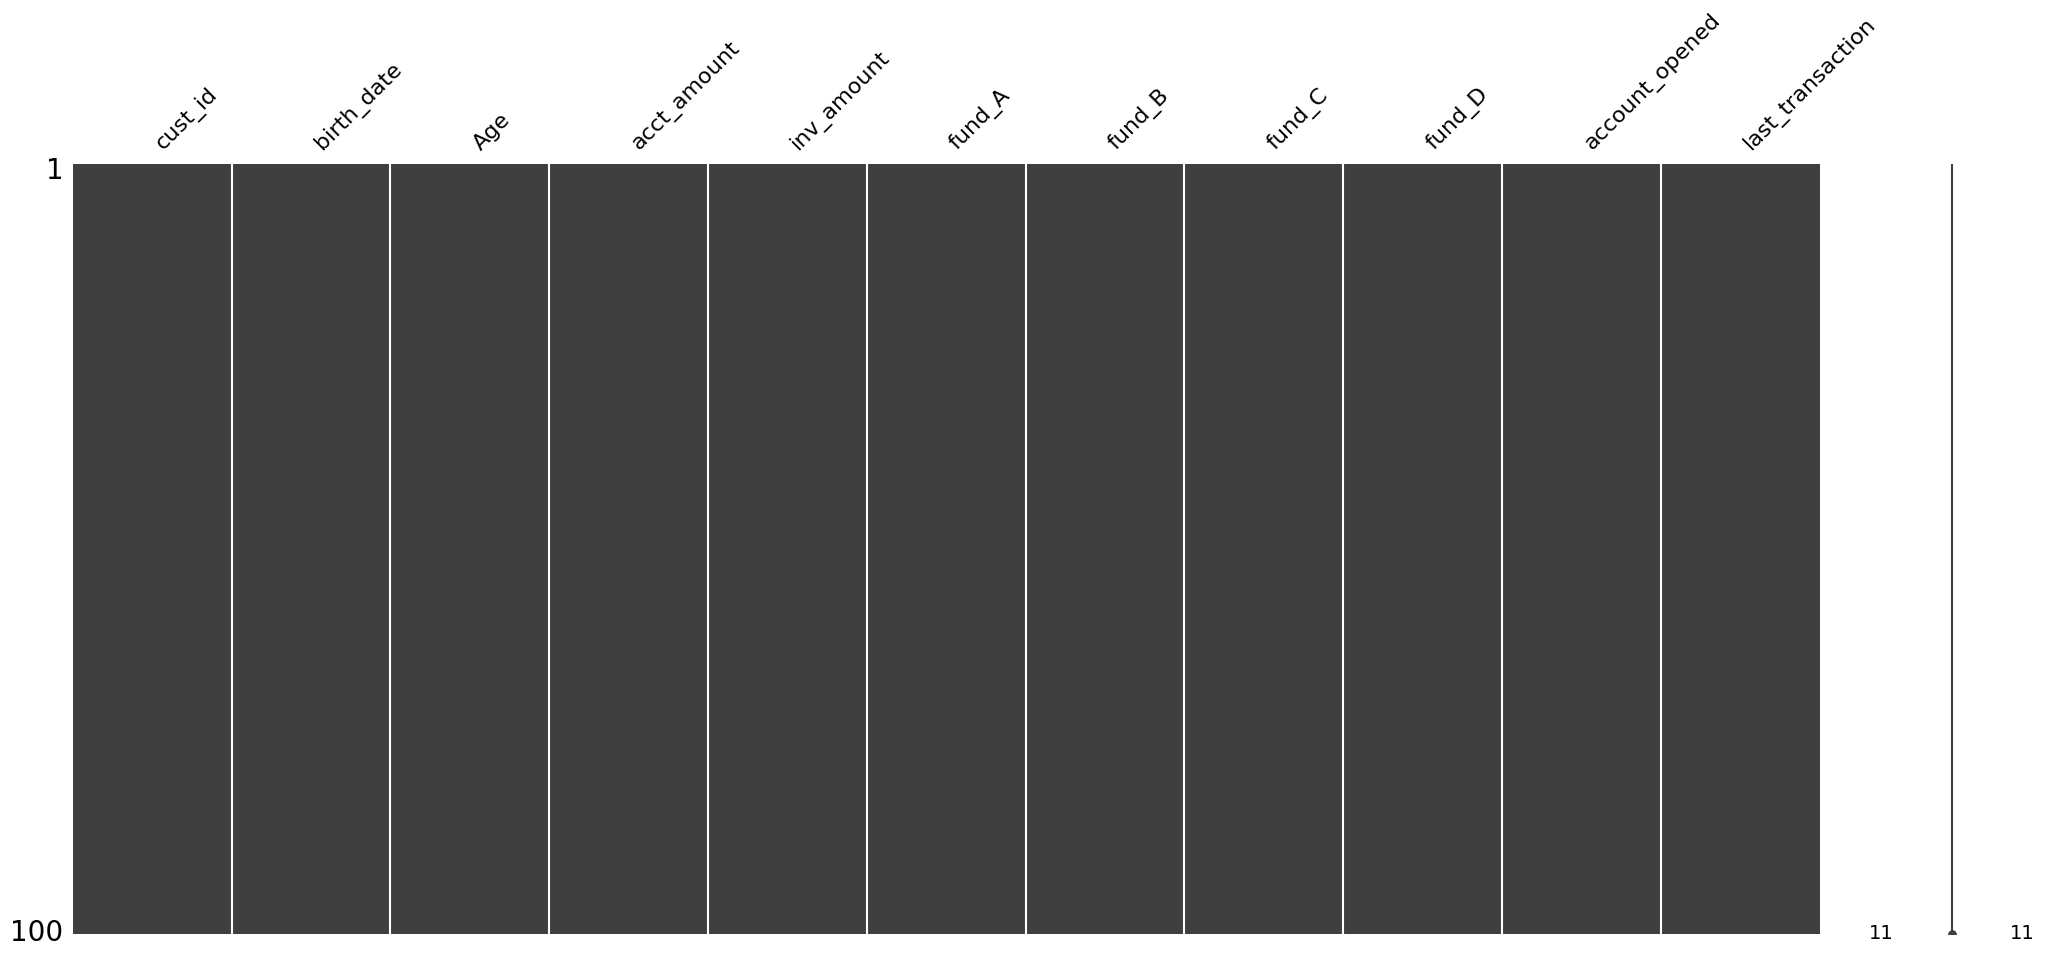

In [48]:
import missingno as msno
import matplotlib.pyplot as plt

# Print number of missing values in banking
print(banking_dirty.isna().sum())

# Visualize missingness matrix
msno.matrix(banking_dirty)
plt.show()

## Record linkage

Record linkage is a technique used to merge multiple datasets together. They are used when values have typos or different spellings. In this section, we'll demonstrate how to link records by calculating the similarity between strings. We’ll then use show this with an example of joining two restaurant review datasets into one clean master dataset.

+ comparing strings
  + use `thefuzz` package to compute Levenshtein distances
  + use the `process` method to compare an array of strings to a given string
    + no real documentation for the `thefuzz`, but what I found from playing around...
    + `thefuzz.process(reference_string, series_of_strings_to_compare, limit = number of comparisons in the series to consider)`
  + handle the case of **many** variations of string
    + e.g. **Europe** might be represented by: "EU", "eur", "Europ", "Europa", "Erope", "Evropa"...
  + 

In [49]:
 # Lets us compare between two strings 
from thefuzz import fuzz
from thefuzz import process

# Compare reeding vs reading 
print(fuzz.WRatio('Reeding', 'Reading'))

 # Partial string comparison 
print(fuzz.WRatio('Houston Rockets', 'Rockets') )

# Partial string comparison with different order 
print(fuzz.WRatio('Houston Rockets vs Los Angeles Lakers', 'Lakers vs Rockets'))

86
90
86


In [50]:
# Define string and array of possible matches 
string = "Houston Rockets vs Los Angeles Lakers" 
choices = pd.Series(['Rockets vs Lakers', 'Lakers vs Rockets',  
                     'Houson vs Los Angeles', 'Heat vs Bulls']) 
process.extract(string, choices, limit = 4)  # each tuple represents (string_to_compare, score, position_in_comparison_array)

[('Rockets vs Lakers', 86, 0),
 ('Lakers vs Rockets', 86, 1),
 ('Houson vs Los Angeles', 86, 2),
 ('Heat vs Bulls', 86, 3)]

In [51]:
# pd.set_option('display.max_rows', None)
# read fixed width column data
# restaurants = pd.read_fwf('./data/restaurants.txt')
# write back out as csv
# restaurants.to_csv('./data/restaurants.csv', index = False)

In [52]:
restaurants = pd.read_csv('./data/restaurants.csv')
print(restaurants.shape)
restaurants.iloc[130:150, :]

(287, 5)


,rest_name,rest_addr,city,phone,cuisine_type
130,follonico,6 w. 24th st.,new york,2126916359,italian
131,fraunces tavern,54 pearl st. at broad st.,new york,2122690144,american
132,frico bar,402 w. 43rd st. off 9th ave.,new york,2125647272,italian
133,fujiyama mama,467 columbus ave. between 82nd and 83rd sts .,new york,2127691144,asian
134,gallagher s,228 w. 52nd st.,new york,2122455336,american
135,girafe,208 e. 58th st. between 2nd and 3rd aves .,new york,2127523054,italian
136,global,33 93 2nd ave. between 5th and 6th sts .,new york,2124778427,american
137,golden unicorn,18 e. broadway at catherine st.,new york,2129410911,asian
138,grand ticino,228 thompson st. between w. 3rd and bleecker ...,new york,2127775922,italian
139,halcyon,151 w. 54th st. in the rihga royal hotel,new york,2124688888,american


In [53]:
# Import process from thefuzz
# from thefuzz import process

# Store the unique values of cuisine_type in unique_types
unique_types = restaurants['cuisine_type'].unique()
print(f"number of unique cuising types: {len(unique_types)}")

# Calculate similarity of 'asian' to all values of unique_types
print(process.extract('asian', unique_types, limit = len(unique_types)))

# Calculate similarity of 'american' to all values of unique_types
print(process.extract('american', unique_types, limit = len(unique_types)))

# Calculate similarity of 'italian' to all values of unique_types
print(process.extract('italian', unique_types, limit = len(unique_types)))

number of unique cuising types: 33
[('asian', 100), ('asiane', 91), ('asiann', 91), ('asiian', 91), ('asiaan', 91), ('asianne', 83), ('asiat', 80), ('italiann', 72), ('italiano', 72), ('italianne', 72), ('italiaan', 68), ('italiian', 68), ('itallian', 68), ('italian', 67), ('amurican', 62), ('american', 62), ('ameerican', 60), ('aamerican', 60), ('ameriican', 60), ('amerrican', 60), ('ameerrican', 60), ('ammereican', 60), ('americann', 57), ('americano', 57), ('ammericann', 54), ('americin', 51), ('amerycan', 51), ('america', 50), ('merican', 50), ('murican', 50), ('italien', 50), ('americen', 46), ('itali', 40)]
[('american', 100), ('americann', 94), ('americano', 94), ('ameerican', 94), ('aamerican', 94), ('ameriican', 94), ('amerrican', 94), ('america', 93), ('merican', 93), ('ammericann', 89), ('ameerrican', 89), ('ammereican', 89), ('amurican', 88), ('americen', 88), ('americin', 88), ('amerycan', 88), ('murican', 80), ('asian', 62), ('asiane', 57), ('asiann', 57), ('asiian', 57),

In [54]:
categories = ["american", "italian", "asian"]

# Iterate through categories
for cuisine in categories:
    # print(f"********** checking cuisine: {cuisine} **********")
    # Create a list of matches, comparing cuisine with the cuisine_type column
    matches = process.extract(cuisine, restaurants['cuisine_type'], limit=len(restaurants.cuisine_type))

    # Iterate through the list of matches
    for match in matches:
        # print(match)
        # Check whether the similarity score is greater than or equal to 80
        if match[1] >= 80:
            # If it is, select all rows where the cuisine_type is spelled this way, and set them to the correct cuisine
            restaurants.loc[restaurants['cuisine_type'] == match[0], 'cuisine_type'] = cuisine
      
# Inspect the final result
print(restaurants['cuisine_type'].unique())

['american' 'asian' 'italian']
